In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mne

from scipy.fft import fft, fftfreq
from scipy.io import loadmat
from scipy.signal import spectrogram

In [3]:
eeg_mat = loadmat('RawData.mat')
fs = eeg_mat['sampling_rate'][0][0]
time = np.linspace(0, eeg_mat['EEG_data'].shape[1] / fs, eeg_mat['EEG_data'].shape[1], endpoint=False)

In [4]:
def center(x):
    mean = np.mean(x, axis=1, keepdims=True)
    centered =  x - mean
    return centered, mean

def covariance(x):
    mean = np.mean(x, axis=1, keepdims=True)
    n = np.shape(x)[1] - 1
    m = x - mean

    return (m.dot(m.T))/n

def whiten(x):
    # Calculate the covariance matrix
    coVarM = covariance(x)

    # Single value decoposition
    U, S, V = np.linalg.svd(coVarM)

    # Calculate diagonal matrix of eigenvalues
    d = np.diag(1.0 / np.sqrt(S))

    # Calculate whitening matrix
    whiteM = np.dot(U, np.dot(d, U.T))

    # Project onto whitening matrix
    Xw = np.dot(whiteM, x)

    return Xw, whiteM

x = eeg_mat['EEG_data']

# Center signals
xc, ux = center(x)

# Whiten mixed signals
xw, wm = whiten(xc)

n_sensor = eeg_mat['EEG_data'].shape[0]
# data = np.array([eeg / np.std(eeg) for eeg in eeg_mat['EEG_data']])

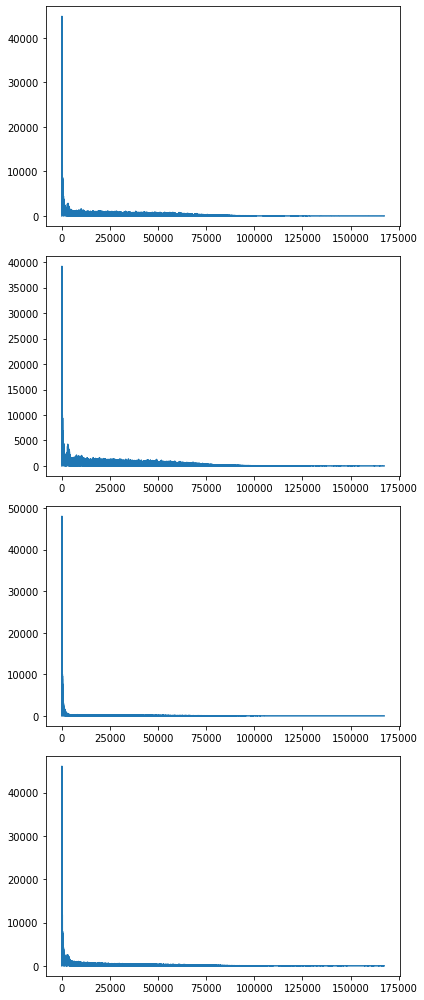

In [14]:
fig, ax = plt.subplots(4, figsize=(6, 14))
for i, d in enumerate(xw[-4:]):
    ax[i].plot(np.abs(fft(d)[:d.shape[0] // 2]))
    ax.set_xlim([0, ])
fig.tight_layout()

/home/preyesr/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/preyesr/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/preyesr/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/preyesr/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


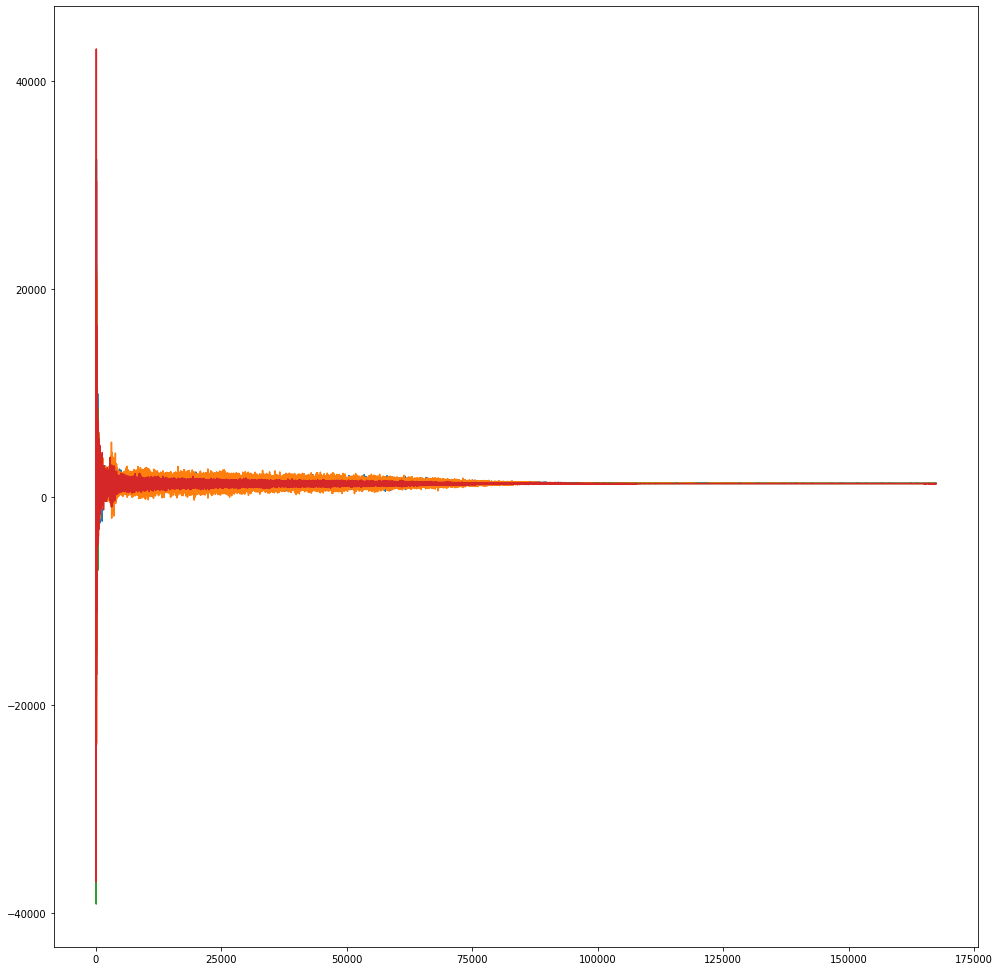

In [8]:
fig, ax = plt.subplots(figsize=(14, n_sensor*0.2))

for i, d in enumerate(xw):
    ax.plot(time, d + (n_sensor - i) * 20)
plt.tight_layout()

In [16]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=30)
S_ = ica.fit_transform(xw[:-4].T)

In [17]:
S_.T.shape

(30, 334848)

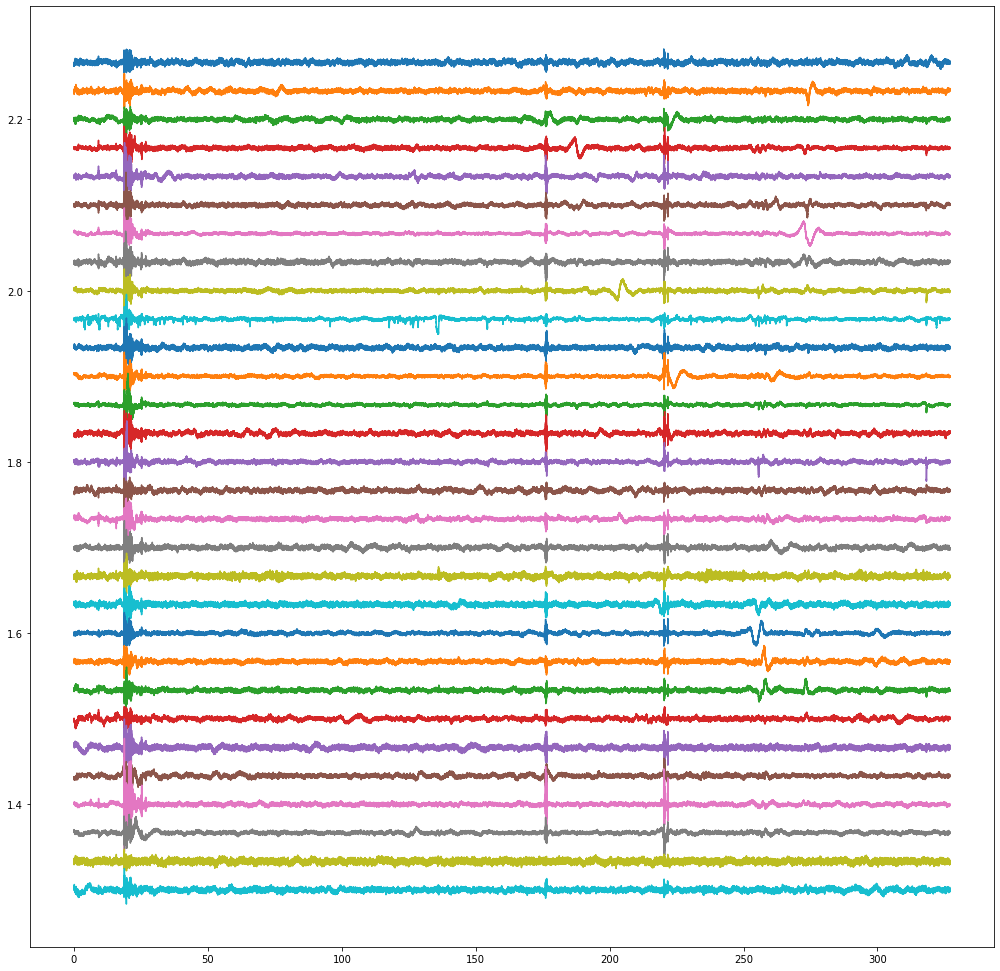

In [25]:
fig, ax = plt.subplots(figsize=(14, n_sensor*0.2))
for i, d in enumerate(S_.T):
    ax.plot(time, d + (n_sensor - i)/30)
plt.tight_layout()

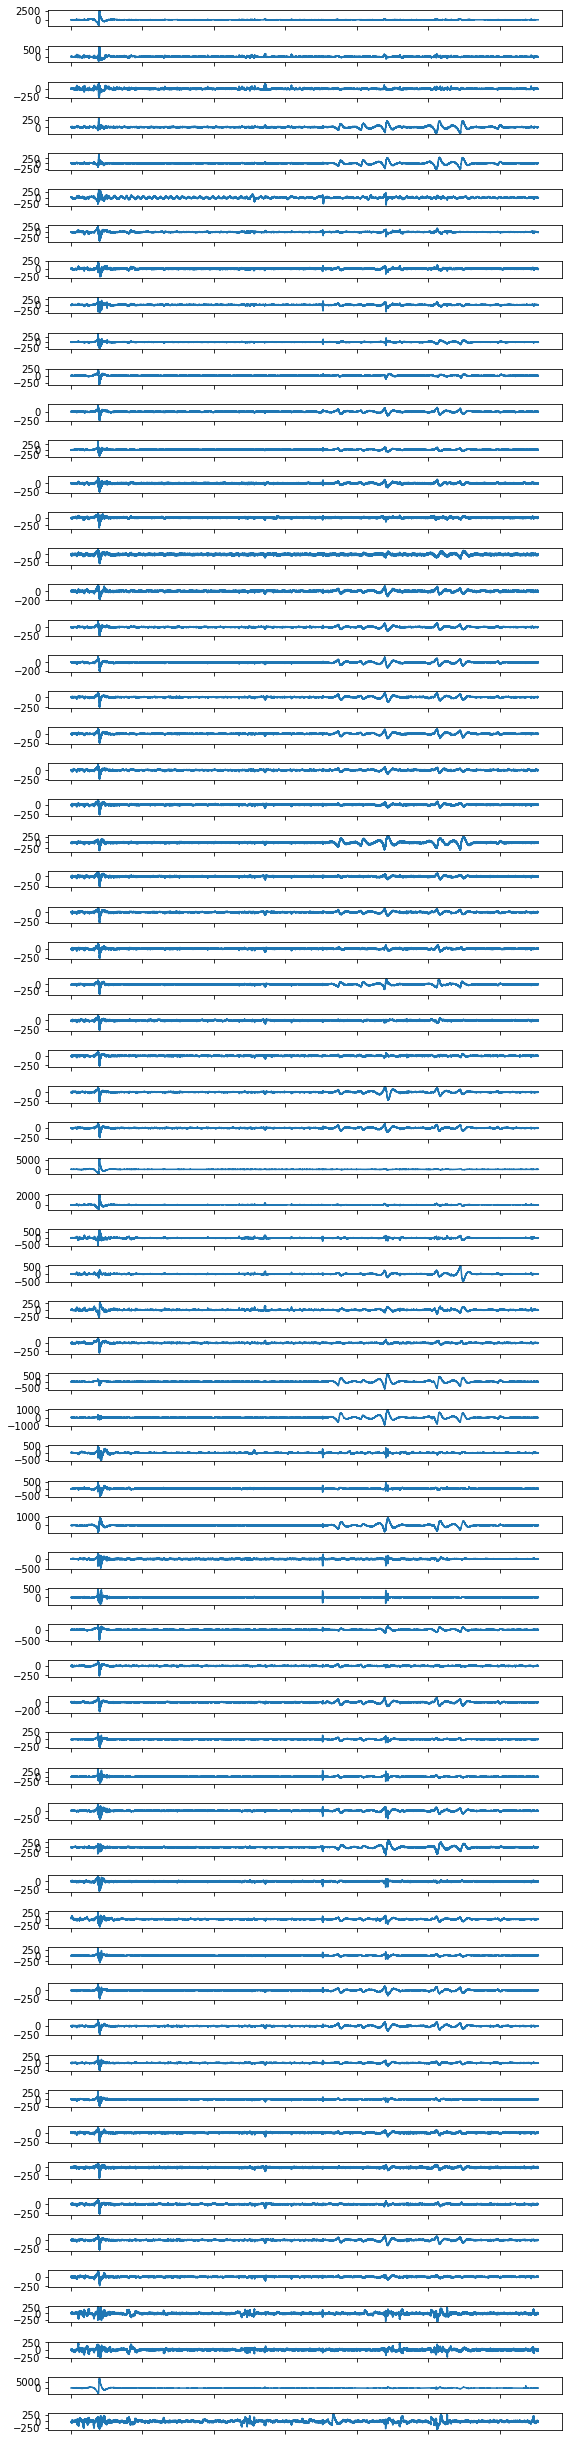

In [36]:
n_sensor = eeg_mat['EEG_data'].shape[0]
fig, ax = plt.subplots(n_sensor, figsize=(8, n_sensor*0.5))

for i, _ax in enumerate(ax):
    _ax.plot(time, eeg_mat['EEG_data'][i])
    _ax.tick_params(labelbottom=False)
plt.tight_layout()

In [48]:
data = [eeg / np.std(eeg) for eeg in eeg_mat['EEG_data']]

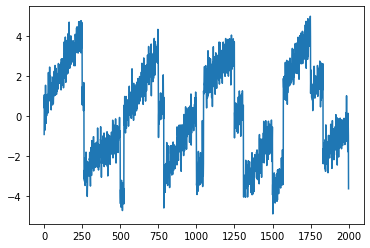

In [83]:
from scipy import signal
np.random.seed(0)
n_samples = 2000
time0 = np.linspace(0, 8, n_samples)
s1 = np.sin(2 * time0)
s2 = np.sign(np.sin(3 * time0))
s3 = signal.sawtooth(2 * np.pi * time0)
S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)
S /= S.std(axis=0)

A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])
X = np.dot(S, A.T)
plt.plot(X[:, 1])

In [85]:
X.shape

(2000, 3)